Analysis of Life Expectancy

In [1]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(rstanarm)
library(dplyr, warn.conflicts = FALSE)
library(ggrepel)
library(rstan)
library(rstanarm)
library(reshape2)
library(ggplot2)
library(tidyr)
library(gridExtra)
library(rstanarm)
library(rstan)
library(bayesplot)
theme_set(theme_minimal())
library(loo)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
library(rprojroot)
library(brms)
library(corrplot)


Loading required package: Rcpp

This is rstanarm version 2.21.1

- See https://mc-stan.org/rstanarm/articles/priors for changes to default priors!

- Default priors may change, so it's safest to specify priors, even if equivalent to the defaults.

- For execution on a local, multicore CPU with excess RAM we recommend calling

  options(mc.cores = parallel::detectCores())

Loading required package: ggplot2

Loading required package: StanHeaders

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths


The following object is masked from ‘package:rstan’:

    extract



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


This is

In [17]:
data = read.csv(file = 'LifeExpectancyData.csv')
#head(data)
#dim(data)

data = dplyr::filter(data, Year == 2010)
#head(data)
#dim(data)
#colnames(data)

#data = dplyr::select(data, "Life.expectancy",  "Adult.Mortality", "Alcohol",  "Hepatitis.B" , "Measles" ,"BMI", "under.five.deaths", "Polio",  "Total.expenditure" ,"Diphtheria" , "HIV.AIDS" ,"GDP" ,"Population" ,"Schooling")
#data = dplyr::select(data, "Life.expectancy",  "Adult.Mortality", "infant.deaths", "Alcohol", "Hepatitis.B" , "Measles" ,"BMI", "Polio", "Total.expenditure" ,"Diphtheria" , "HIV.AIDS" ,"GDP" , "Schooling")
data = dplyr::select(data, "Life.expectancy",  "Adult.Mortality", "infant.deaths", "Alcohol", "Hepatitis.B" , "Measles" ,"BMI", "Polio", "Total.expenditure" ,"Diphtheria" , "HIV.AIDS" ,"GDP" , "Schooling")

data = na.omit(data)
dim(data)

[1] 142  13

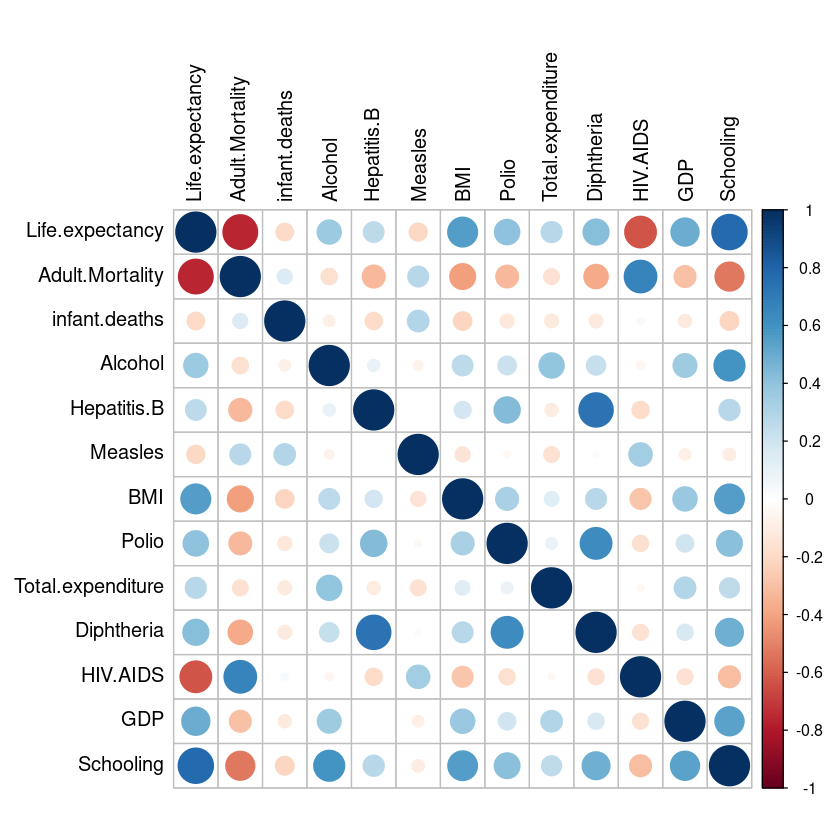

In [4]:
corrplot(cor(data, use="pairwise.complete.obs"), 
         tl.col = "black")

Variabel selection methods

In [ ]:
#data = dplyr::select(data, "Life.expectancy",  "Adult.Mortality", "infant.deaths", "Alcohol", "Hepatitis.B" , "Measles" ,"BMI", "Polio", "Total.expenditure" ,"Diphtheria" , "HIV.AIDS" ,"GDP" , "Schooling")


In [18]:
fit_multiple_variables <- brm(Life.expectancy ~ Adult.Mortality + Alcohol + infant.deaths +  Hepatitis.B + Measles + BMI  + Polio + Total.expenditure + Diphtheria + HIV.AIDS + GDP + Schooling , data = data, family = gaussian(), prior = c(set_prior("normal(0,1)", class = "b"), set_prior("normal(70,10)", class = "Intercept")), iter=4000, control = list(max_treedepth = 20))

Compiling Stan program...

Start sampling



Using 10 posterior samples for ppc type 'dens_overlay' by default.



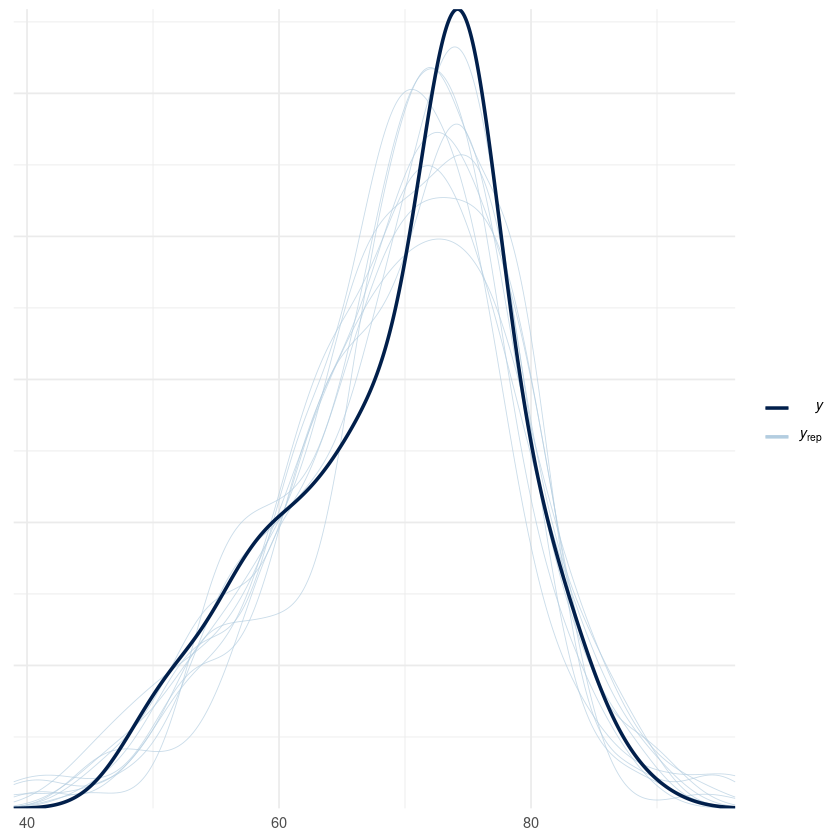

In [19]:
pp_check(fit_multiple_variables)

In [7]:
fit_multiple_variables_prior_sensitivity <- brm(Life.expectancy ~ Adult.Mortality + Alcohol + infant.deaths +  Hepatitis.B + Measles + BMI  + Polio + Total.expenditure + Diphtheria + HIV.AIDS + GDP + Schooling , data = data, family = gaussian(), c(set_prior("normal(0,1)", class = "b"), set_prior("normal(0,1)", class = "Intercept")), iter=4000, control = list(max_treedepth = 20))

Compiling Stan program...

Start sampling



Using 10 posterior samples for ppc type 'dens_overlay' by default.



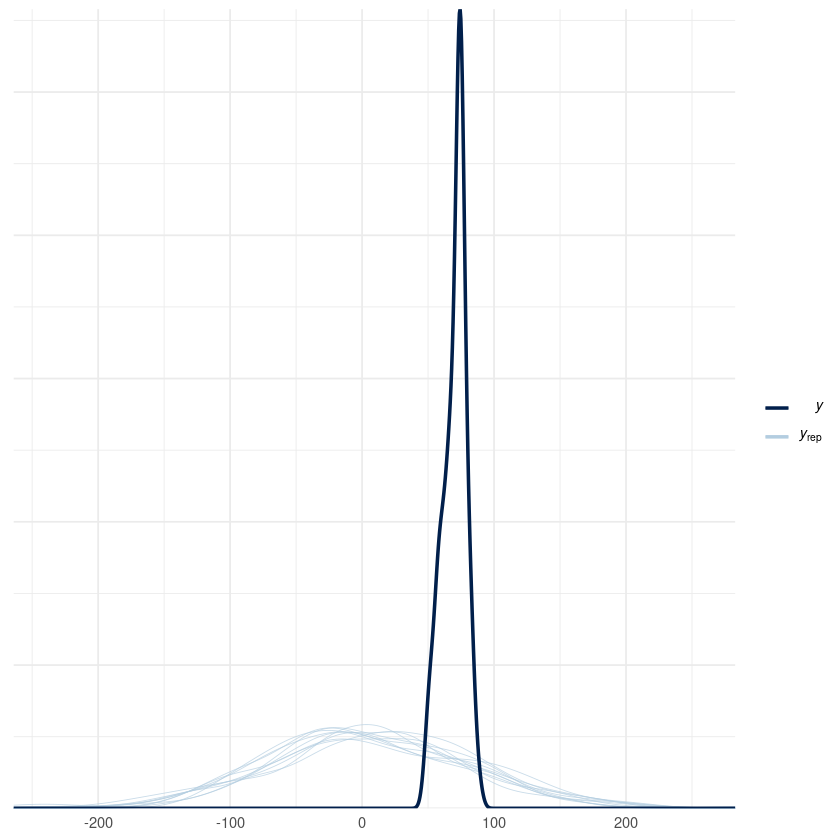

In [8]:
pp_check(fit_multiple_variables_prior_sensitivity)

Warning message in cv_varsel.refmodel(refmodel, ...):
“K provided, but cv_method is LOO.”
Warning message:
“Some Pareto k diagnostic values are too high. See help('pareto-k-diagnostic') for details.
”


[1] "Computing LOOs..."
  |======================================================================| 100%
[1] "Performing the selection using all the data.."
[1] "Done."


,size,solution_terms,elpd,elpd.se
,<dbl>,<fct>,<dbl>,<dbl>
2,0,NA,-509.8006,7.555412
3,1,Adult.Mortality,-456.3391,13.020353
4,2,Schooling,-411.6709,11.218191
5,3,HIV.AIDS,-401.0051,9.518624
6,4,BMI,-402.3603,9.625814
7,5,GDP,-398.0305,9.506980
8,6,Total.expenditure,-397.5856,9.618830
9,7,Polio,-396.9170,9.736907
10,8,Diphtheria,-399.5593,10.219913


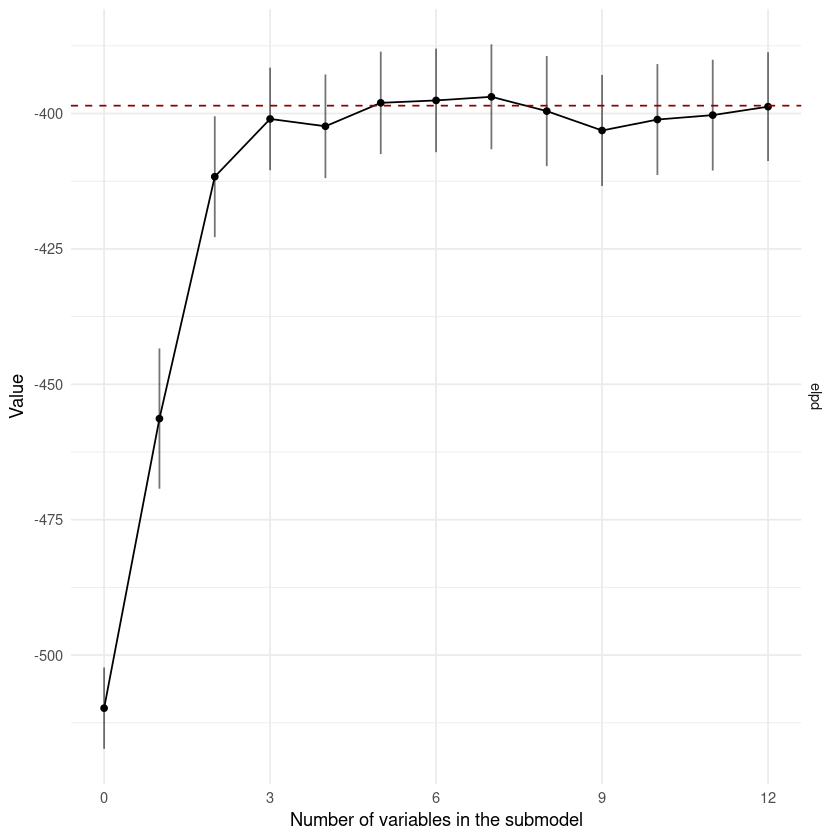

In [9]:
cv_vs <- cv_varsel(fit_multiple_variables)
summary(cv_vs)
plot(cv_vs)


In [10]:
data = dplyr::select(data, "Life.expectancy",  "Adult.Mortality", "HIV.AIDS", "Schooling")


In [16]:
dim(data)

[1] 142   4

In [11]:
fit_varsel_variables <- brm(Life.expectancy ~ Adult.Mortality + HIV.AIDS + Schooling , data = data,family = gaussian(), prior = c(set_prior("normal(0,1)", class = "b"), set_prior("normal(70,1)", class = "Intercept")), iter=4000, control = list(max_treedepth = 20))

Compiling Stan program...

Start sampling



Using 10 posterior samples for ppc type 'dens_overlay' by default.



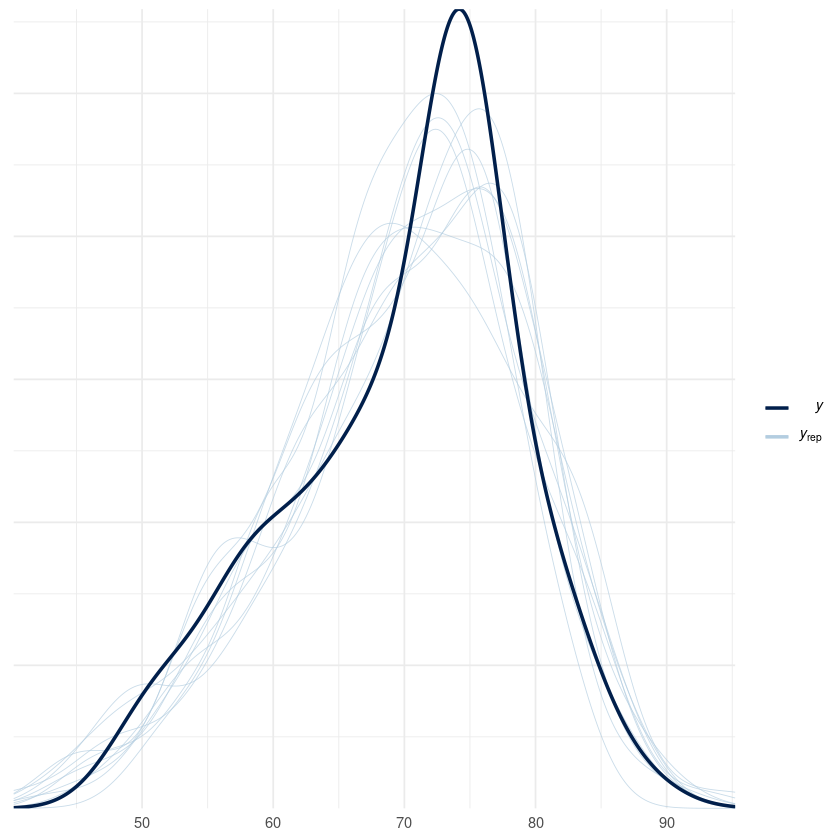

In [12]:
pp_check(fit_varsel_variables)

In [ ]:
fit_varsel_variables_prior_sensitivity <- brm(Life.expectancy ~ Adult.Mortality + HIV.AIDS + Schooling , data = data,family = gaussian(), prior = set_prior("normal(0,10)", class = "b"), iter=4000, control = list(max_treedepth = 20))

In [ ]:
pp_check(fit_varsel_variables_prior_sensitivity)

In [13]:
(loo1 <- loo(fit_multiple_variables))

Warning message:
“Found 1 observations with a pareto_k > 0.7 in model 'fit_multiple_variables'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”



Computed from 8000 by 142 log-likelihood matrix

         Estimate   SE
elpd_loo   -398.6 10.0
p_loo        13.9  2.3
looic       797.1 20.1
------
Monte Carlo SE of elpd_loo is NA.

Pareto k diagnostic values:
                         Count Pct.    Min. n_eff
(-Inf, 0.5]   (good)     139   97.9%   1792      
 (0.5, 0.7]   (ok)         2    1.4%   349       
   (0.7, 1]   (bad)        1    0.7%   225       
   (1, Inf)   (very bad)   0    0.0%   <NA>      
See help('pareto-k-diagnostic') for details.

In [14]:
(loo2 <- loo(fit_varsel_variables)) 

Warning message:
“Found 1 observations with a pareto_k > 0.7 in model 'fit_varsel_variables'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”



Computed from 8000 by 142 log-likelihood matrix

         Estimate   SE
elpd_loo   -400.2 10.5
p_loo         7.4  1.8
looic       800.4 20.9
------
Monte Carlo SE of elpd_loo is NA.

Pareto k diagnostic values:
                         Count Pct.    Min. n_eff
(-Inf, 0.5]   (good)     141   99.3%   1909      
 (0.5, 0.7]   (ok)         0    0.0%   <NA>      
   (0.7, 1]   (bad)        1    0.7%   240       
   (1, Inf)   (very bad)   0    0.0%   <NA>      
See help('pareto-k-diagnostic') for details.

In [15]:
loo_compare(loo1, loo2)

,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
fit_multiple_variables,0.000000,0.000000,-398.5505,10.02773,13.911085,2.337010,797.1011,20.05546
fit_varsel_variables,-1.647883,3.536808,-400.1984,10.47492,7.405123,1.770157,800.3968,20.94985
